In [1]:
#Insurance premium prediction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

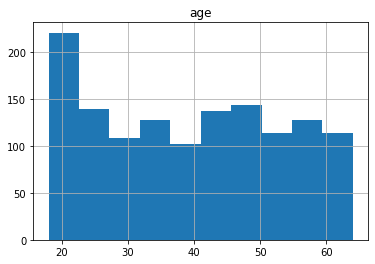

In [7]:
df.hist('age')

array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

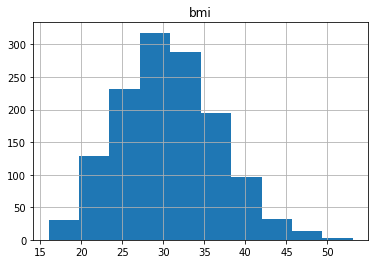

In [8]:
df.hist('bmi')

array([[<AxesSubplot:title={'center':'expenses'}>]], dtype=object)

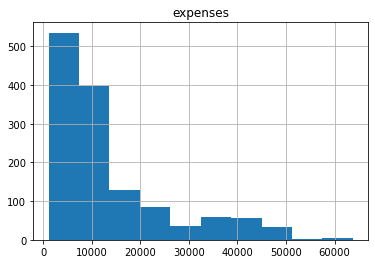

In [9]:
df.hist('expenses')

<AxesSubplot:>

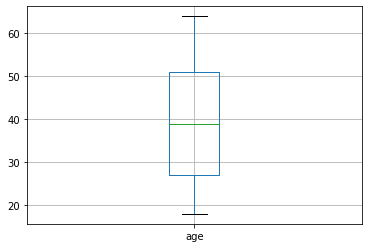

In [10]:
df.boxplot('age')

<AxesSubplot:>

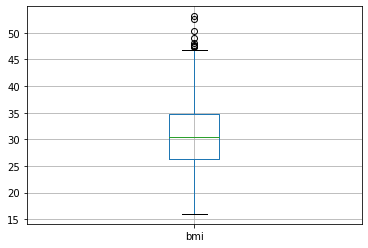

In [11]:
df.boxplot('bmi')

<AxesSubplot:>

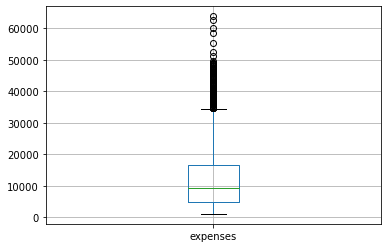

In [12]:
df.boxplot('expenses')

In [13]:
df['A']=df['bmi']
df['A']

0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: A, Length: 1337, dtype: float64

In [14]:
df['B']=df['expenses']
df['B']

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: B, Length: 1337, dtype: float64

<AxesSubplot:>

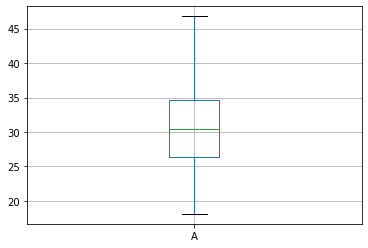

In [15]:
df=df.loc[(df.A>18) & (df.A<47)]
df['A']
df.boxplot('A')

<AxesSubplot:>

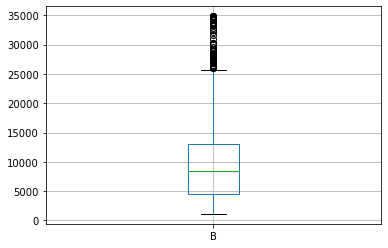

In [16]:
df=df.loc[(df.B>0) & (df.B<35000)]
df['B']
df.boxplot('B')

In [17]:
df1= pd.get_dummies (data = df, drop_first=True)

In [18]:
df1

,age,bmi,children,expenses,A,B,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,27.9,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,33.8,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,33.0,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,22.7,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,28.9,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,31.0,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,31.9,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,36.9,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,25.8,2007.95,0,0,0,0,1


In [19]:
df1=df1.drop(["B"], axis=1)
df1

,age,bmi,children,expenses,A,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,27.9,0,1,0,0,1
1,18,33.8,1,1725.55,33.8,1,0,0,1,0
2,28,33.0,3,4449.46,33.0,1,0,0,1,0
3,33,22.7,0,21984.47,22.7,1,0,1,0,0
4,32,28.9,0,3866.86,28.9,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,31.0,1,0,1,0,0
1334,18,31.9,0,2205.98,31.9,0,0,0,0,0
1335,18,36.9,0,1629.83,36.9,0,0,0,1,0
1336,21,25.8,0,2007.95,25.8,0,0,0,0,1


In [20]:
#Standarizarion
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(1,3))
data_rescaled = data_scaler.fit_transform(df1)
print(data_rescaled)

[[1.04347826 1.68292683 1.         ... 1.         1.         3.        ]
 [1.         2.09407666 1.4        ... 1.         3.         1.        ]
 [1.43478261 2.03832753 2.2        ... 1.         3.         1.        ]
 ...
 [1.         2.31010453 1.         ... 1.         3.         1.        ]
 [1.13043478 1.53658537 1.         ... 1.         1.         3.        ]
 [2.86956522 1.76655052 1.         ... 3.         1.         1.        ]]


In [21]:
#train test split 
from sklearn.model_selection import train_test_split

In [22]:
X= df1.drop('expenses',axis='columns')
X

,age,bmi,children,A,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,27.9,0,1,0,0,1
1,18,33.8,1,33.8,1,0,0,1,0
2,28,33.0,3,33.0,1,0,0,1,0
3,33,22.7,0,22.7,1,0,1,0,0
4,32,28.9,0,28.9,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,31.0,1,0,1,0,0
1334,18,31.9,0,31.9,0,0,0,0,0
1335,18,36.9,0,36.9,0,0,0,1,0
1336,21,25.8,0,25.8,0,0,0,0,1


In [23]:
y=df1.expenses

In [24]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1183, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train

,age,bmi,children,A,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
740,45,24.0,2,24.0,1,0,0,0,0
1104,37,29.8,0,29.8,1,0,0,0,1
1125,63,25.1,0,25.1,0,0,1,0,0
825,64,31.8,2,31.8,0,0,0,0,0
319,32,37.3,1,37.3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1180,42,41.3,1,41.3,0,0,0,0,0
1238,37,22.7,3,22.7,1,0,0,0,0
1276,22,30.4,0,30.4,0,0,0,0,0
973,19,40.5,0,40.5,0,0,0,0,1


In [26]:
y_train

740      8604.48
1104    20420.60
1125    14254.61
825     16069.08
319      4667.61
          ...   
1180     7650.77
1238     6985.51
1276     2741.95
973      1759.34
1272    14478.33
Name: expenses, Length: 946, dtype: float64

In [27]:
 X_test

,age,bmi,children,A,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
910,22,28.3,1,28.3,1,0,1,0,0
1281,47,27.6,2,27.6,0,1,1,0,0
1184,23,28.5,1,28.5,0,1,0,1,0
102,18,30.1,0,30.1,0,0,0,0,0
1056,48,28.9,0,28.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
162,54,39.6,1,39.6,1,0,0,0,1
485,31,31.1,0,31.1,0,0,0,0,0
926,19,23.4,2,23.4,0,0,0,0,1
259,19,31.9,0,31.9,1,1,1,0,0


In [28]:
y_test

910      2639.04
1281    24535.70
1184    18328.24
102     21344.85
1056     8277.52
          ...   
162     10450.55
485      4347.02
926      2913.57
259     33750.29
1092     3591.48
Name: expenses, Length: 237, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.svm import SVR
svm= SVR()
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gr= GradientBoostingRegressor()


In [30]:
lr=lr.fit(X_train, y_train)
svm=svm.fit(X_train, y_train)
rf=rf.fit(X_train, y_train)
gr=gr.fit(X_train, y_train)

In [31]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)
df2=pd.DataFrame({'Actual':y_test, 'lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})
df2

,Actual,lr,svm,rf,gr
910,2639.04,4488.049487,8461.064087,4253.1866,4499.244450
1281,24535.70,25996.494341,8585.498550,24456.4574,23475.338725
1184,18328.24,19250.826607,8464.525650,18753.7584,18824.423568
102,21344.85,3687.863903,8448.033694,2416.5580,3200.297417
1056,8277.52,9184.002941,8590.375521,14588.3066,10532.333428
...,...,...,...,...,...
162,10450.55,11700.211492,8613.335666,11869.8853,10884.389500
485,4347.02,6784.045575,8497.367579,4344.0020,4438.384497
926,2913.57,2843.764567,8457.039932,7354.3382,5162.705741
259,33750.29,18908.616213,8450.373787,34363.2503,33225.704097


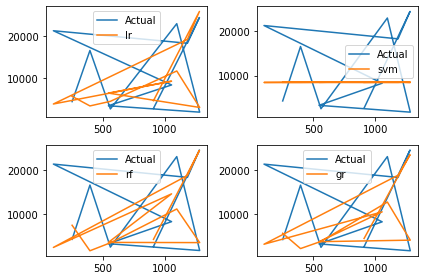

In [32]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[0:11], label='Actual')
plt.plot(df2['lr'].iloc[0:11], label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df2['Actual'].iloc[0:11], label='Actual')
plt.plot(df2['svm'].iloc[0:11], label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'].iloc[0:11], label='Actual')
plt.plot(df2['rf'].iloc[0:11], label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df2['Actual'].iloc[0:11], label='Actual')
plt.plot(df2['gr'].iloc[0:11], label='gr')

plt.tight_layout()

plt.legend()

In [33]:
from sklearn import metrics

In [34]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [35]:
print(score1,score2,score3,score4)

0.5809669449827952 -0.0237409267395412 0.653289040489625 0.6688831741495809


In [36]:
s1= metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3= metrics.mean_absolute_error(y_test,y_pred3)
s4= metrics.mean_absolute_error(y_test,y_pred4)
print (s1,s2,s3,s4)

2829.4194680493315 5724.813850034861 2413.792923628692 2317.786305989874


In [43]:
data= {'age':40,
      'A':40.30,
      'bmi':40.30,
       'sex_male':1,
      'childern':4,
       'smoker_yes':1,
       'region_northwest':1,
      'region_southwest':0,
      'region_southeast':0}
df = pd.DataFrame(data,index=[0])
df

,age,A,bmi,sex_male,childern,smoker_yes,region_northwest,region_southwest,region_southeast
0,40,40.3,40.3,1,4,1,1,0,0


In [44]:
new_pred = gr.predict(df)
print(new_pred)

[28115.95889208]


In [46]:
gr=gr.fit(X, y)
gr

GradientBoostingRegressor()

In [47]:
import joblib

In [48]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [49]:
model= joblib.load('model_joblib_gr')

In [50]:
model.predict(df)

array([28268.62819096])